In [77]:
!pip install opendatasets

In [78]:
import opendatasets as od
import pandas

In [79]:
od.download('https://www.kaggle.com/datasets/salader/dogs-vs-cats')

Skipping, found downloaded files in "./dogs-vs-cats" (use force=True to force download)


In [80]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,BatchNormalization,Dropout

In [81]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [82]:
#Normalize
def process(image,lable):
  image = tf.cast(image/255.,tf.float32)
  return image,lable

train_ds = train_ds.map(process)

validation_ds = validation_ds.map(process)

In [83]:
#model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3),kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(2,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 125, 125, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 60, 60, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,714,690 (14.17 MB)

 Trainable params: 3,714,498 (14.17 MB)

 Non-trainable params: 192 (768.00 B)

In [85]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [86]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.5888 - loss: 2.9115 - val_accuracy: 0.5828 - val_loss: 1.3881
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 66ms/step - accuracy: 0.6889 - loss: 1.1345 - val_accuracy: 0.7164 - val_loss: 0.8412
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.7431 - loss: 0.7909 - val_accuracy: 0.6244 - val_loss: 0.8509
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.7748 - loss: 0.7017 - val_accuracy: 0.7062 - val_loss: 0.8581
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.7885 - loss: 0.7255 - val_accuracy: 0.6748 - val_loss: 0.9479
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.8007 - loss: 0.6983 - val_accuracy: 0.7586 - val_loss: 0.8460
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.8091 - loss: 0.7178 - val_accuracy: 0.6816 - val_loss: 0.9311
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.8339 - loss: 0.6973 - 

In [87]:
import cv2

In [88]:
test_img = cv2.imread('/content/Dog-Images.jpg')

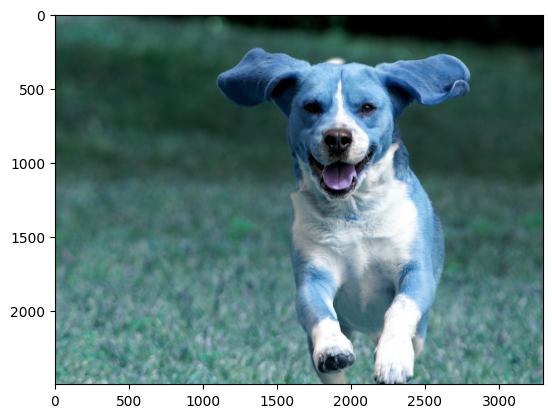

In [89]:
plt.imshow(test_img)

In [90]:
test_img.shape

(2497, 3296, 3)

In [91]:
test_img = cv2.resize(test_img,(256,256))

In [92]:
test_input = test_img.reshape((1,256,256,3))

In [93]:
import numpy as np
prediction = model.predict(test_input)
class_labels = ['cat', 'dog']
predicted_class = class_labels[np.argmax(prediction)]
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
dog
